# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

## 以下是為了測試weights visualization, hidden layer 簡化到只有一層, 然後就觀察那一層的weights

In [8]:
#model.add(Dense(units=256, 
#                input_dim=784, 
#                kernel_initializer='normal', 
#                activation='relu'))

In [9]:
model.add(Dense(units=10,
                input_dim=784,
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
#model.add(Dense(units=10, 
#                kernel_initializer='normal', 
#                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.8894 - acc: 0.7804 - val_loss: 0.4742 - val_acc: 0.8843
Epoch 2/10
0s - loss: 0.4395 - acc: 0.8865 - val_loss: 0.3692 - val_acc: 0.9019
Epoch 3/10
0s - loss: 0.3696 - acc: 0.9004 - val_loss: 0.3324 - val_acc: 0.9110
Epoch 4/10
0s - loss: 0.3383 - acc: 0.9071 - val_loss: 0.3118 - val_acc: 0.9154
Epoch 5/10
1s - loss: 0.3192 - acc: 0.9125 - val_loss: 0.2982 - val_acc: 0.9183
Epoch 6/10
0s - loss: 0.3064 - acc: 0.9155 - val_loss: 0.2897 - val_acc: 0.9192
Epoch 7/10
0s - loss: 0.2970 - acc: 0.9170 - val_loss: 0.2848 - val_acc: 0.9215
Epoch 8/10
0s - loss: 0.2901 - acc: 0.9188 - val_loss: 0.2795 - val_acc: 0.9220
Epoch 9/10
0s - loss: 0.2841 - acc: 0.9208 - val_loss: 0.2772 - val_acc: 0.9231
Epoch 10/10
0s - loss: 0.2795 - acc: 0.9228 - val_loss: 0.2728 - val_acc: 0.9251


# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

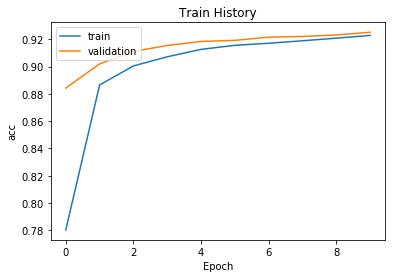

In [15]:
show_train_history(train_history,'acc','val_acc')

In [16]:
# train_history.history['val_acc']

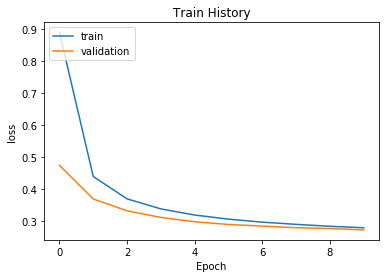

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 8832/10000 [=========================>....] - ETA: 0s()
('accuracy=', 0.92420000000000002)


# 進行預測

In [19]:
prediction=model.predict_classes(x_Test)

 8960/10000 [=========================>....] - ETA: 0s

In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

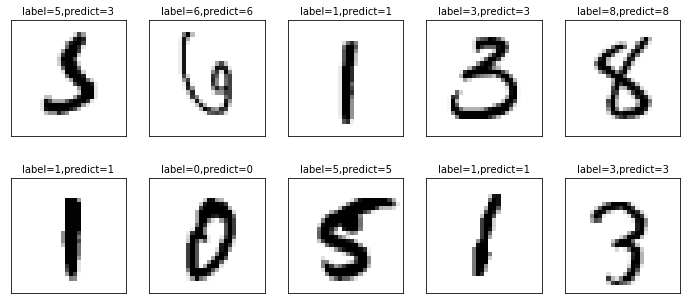

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [23]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,961,0,0,1,0,1,10,1,6,0
1,0,1098,2,3,0,1,4,2,25,0
2,8,6,904,23,6,0,14,9,58,4
3,3,0,14,940,1,6,2,6,30,8
4,1,1,4,1,908,0,14,2,13,38
5,11,2,3,63,9,688,19,8,83,6
6,9,3,4,1,7,5,921,1,7,0
7,2,7,25,12,8,0,0,927,4,43
8,7,3,5,21,8,13,9,7,896,5


In [24]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [25]:
df[(df.label==5)&(df.predict==3)]

,label,predict
187,5,3
340,5,3
412,5,3
502,5,3
857,5,3
1003,5,3
1082,5,3
1339,5,3
1393,5,3
1466,5,3


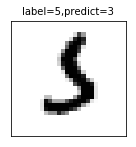

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

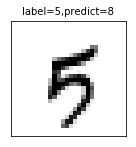

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# Check weights

In [28]:
myWeights = model.get_weights()

In [29]:
len(myWeights)

2

In [30]:
myWeights

[array([[ 0.03526075, -0.0285708 , -0.0644187 , ..., -0.03517743,
          0.0494868 , -0.01685989],
        [ 0.05646305, -0.03973946, -0.02390001, ...,  0.01414485,
         -0.03630277,  0.01401337],
        [-0.02080469, -0.00642796,  0.10683747, ...,  0.03118236,
          0.01811348,  0.08421189],
        ..., 
        [-0.02878533, -0.02631795, -0.02558895, ..., -0.03952516,
          0.0507728 , -0.05342649],
        [ 0.0224755 ,  0.00120949,  0.05849243, ..., -0.03238166,
          0.05622302, -0.03286611],
        [ 0.00329174, -0.00858495, -0.0446592 , ...,  0.022349  ,
          0.03505291, -0.04907042]], dtype=float32),
 array([-0.21692511,  0.39419571,  0.00638235, -0.23693326,  0.13002992,
         0.59482425, -0.07735132,  0.34900674, -0.71470547, -0.16085173], dtype=float32)]

In [ ]:
model.summary()

In [ ]:
len(myWeights[1])

In [ ]:
len(myWeights[2][0])

In [ ]:
myWeights[2][0][9]

In [ ]:
len(myWeights[3])

In [ ]:
myWeights[0][0][0:2].shape

In [ ]:
myWeights[0][:,0].shape

In [31]:
img = myWeights[0][:,0].reshape(28,28)

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.imshow(img, cmap='gray')

In [34]:
plt.colorbar()

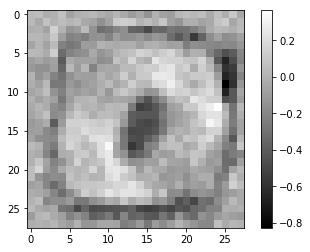

In [35]:
plt.show()

In [43]:
fig = plt.gcf()
fig.set_size_inches(12, 5)

In [44]:
for i in range (0, 10):
    img = myWeights[0][:,i].reshape(28,28)
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([]);
    

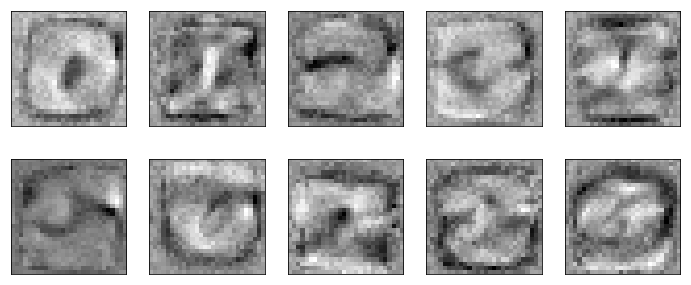

In [45]:
plt.show()

## 以上要看白色的部份, 真的約略可以看出某個cell 對哪個數字形狀敏感
